In [7]:
import json
from pathlib import Path

def load_frames(json_path):
    """Load components→frames JSON."""
    return json.loads(Path(json_path).read_text())

def get_frame(data, comp_idx, frame_idx):
    """Retrieve the frame dict for given component/frame."""
    return data[str(comp_idx)]["frames"][str(frame_idx)]

def normalize_nodes(raw_nodes):
    """
    Convert list of nodes (each a list of labels) into a set of tuples.
    E.g. ['A:ALA:4','A:ALA:6'] → ('A:ALA:4','A:ALA:6').
    """
    return set(tuple(node) for node in raw_nodes)

def normalize_edges(raw_edges):
    """
    Convert raw edges (each [node1_list, node2_list]) into a set of 
    frozensets of two node‐tuples: frozenset({tuple(node1),tuple(node2)}).
    """
    out = set()
    for edge in raw_edges:
        if len(edge) != 2:
            continue
        t1 = tuple(edge[0])
        t2 = tuple(edge[1])
        out.add(frozenset((t1, t2)))
    return out

def frames_equal(f1, f2):
    """True if nodes and edges match exactly (order‐independent)."""
    n1 = normalize_nodes(f1.get("nodes", []))
    n2 = normalize_nodes(f2.get("nodes", []))
    e1 = normalize_edges(f1.get("edges", []))
    e2 = normalize_edges(f2.get("edges", []))
    return (n1 == n2) and (e1 == e2)

def is_subset(f_small, f_large):
    """
    True if every node‐tuple in f_small is in f_large and
    every edge (as frozenset of two node‐tuples) in f_small is in f_large.
    """
    ns = normalize_nodes(f_small.get("nodes", []))
    nl = normalize_nodes(f_large.get("nodes", []))
    es = normalize_edges(f_small.get("edges", []))
    el = normalize_edges(f_large.get("edges", []))
    return ns.issubset(nl) and es.issubset(el)

def compare_frames(data, c1, f1, c2, f2):
    """Pretty‐print equal / subset relations between two frames."""
    A = get_frame(data, c1, f1)
    B = get_frame(data, c2, f2)
    print(f"Comparing comp{c1}_frame{f1} vs comp{c2}_frame{f2}")
    print(f"  Equal?           {frames_equal(A, B)}")
    print(f"  Frame1 ⊆ Frame2? {is_subset(A, B)}")
    print(f"  Frame2 ⊆ Frame1? {is_subset(B, A)}")

# --- USAGE in a Jupyter cell ---

# 1. Load your JSON (adjust path!)
data = load_frames("data/All/graph_All.json")

# 2. Compare a pair
compare_frames(data, 2, 1, 2, 2)

# 3. (Optional) Create a full pairwise DataFrame
import pandas as pd

rows = []
for c1, comp in data.items():
    for f1 in comp["frames"]:
        for c2, comp2 in data.items():
            for f2 in comp2["frames"]:
                A = get_frame(data, int(c1), int(f1))
                B = get_frame(data, int(c2), int(f2))
                rows.append({
                    "c1": int(c1), "f1": int(f1),
                    "c2": int(c2), "f2": int(f2),
                    "equal": frames_equal(A, B),
                    "subset_1_in_2": is_subset(A, B),
                    "subset_2_in_1": is_subset(B, A)
                })

df = pd.DataFrame(rows)
df.head()


KeyError: '2'

In [2]:
prot1 = [('A:VAL:158', 'A:GLN:155', 'C:ILE:5', 3, 4, 2),
('A:ARG:157', 'A:GLN:155', 'C:ILE:5', 3, 4, 2),
('A:VAL:150', 'A:GLN:155', 'C:ILE:5', 3, 4, 2),
('A:HIS:151', 'A:GLN:155', 'C:ILE:5', 3, 4, 2),
('A:GLU:154', 'A:GLN:155', 'C:ILE:5', 2, 4, 2),
('A:ASN:66', 'C:PRO:4', 'C:ILE:5', 2, 4, 2),
('C:ILE:5', 'C:PRO:4', 'C:VAL:6', 2, 3, 3),
('A:GLN:62', 'C:PRO:4', 'C:ILE:5', 3, 5, 2),
('A:ARG:163', 'C:PRO:4', 'C:ILE:5', 3, 4, 2),
('A:LYS:68', 'A:ASN:66', 'C:ILE:5', 3, 5, None),
('A:ARG:65', 'A:ASN:66', 'C:ILE:5', 2, 5, None),
('A:GLN:62', 'A:ASN:66', 'C:ILE:5', 3, 5, None),
('C:ILE:5', 'A:ASN:66', 'C:PRO:4', None, 2, 2),
('A:ALA:69', 'A:ASN:66', 'C:ILE:5', 3, 4, None),
('A:ASN:66', 'C:ILE:5', 'C:PRO:4', None, 2, 2),
('A:ASN:66', 'C:ILE:5', 'C:VAL:6', None, 3, 3),
('A:ASN:66', 'C:ILE:5', 'A:GLN:155', None, 5, 2),
('C:PRO:4', 'C:ILE:5', 'C:VAL:6', 2, 3, 3),
('A:GLN:155', 'C:ILE:5', 'C:PRO:4', 2, 4, 2),
('A:GLN:155', 'C:ILE:5', 'C:VAL:6', 2, 4, 3),
('C:GLN:8', 'C:VAL:6', 'C:ILE:5', 3, 4, 3),
('A:THR:73', 'C:VAL:6', 'C:ILE:5', 2, 4, 3),
('C:ILE:5', 'C:VAL:6', 'C:PRO:4', 3, 2, 3),
('A:ALA:69', 'C:VAL:6', 'C:ILE:5', 2, 4, 3)]

In [3]:
prot2 = [('C:HIS:7', 'A:GLN:155', 'C:ILE:5', 3, 3, 2),
('A:VAL:158', 'A:GLN:155', 'C:ILE:5', 3, 4, 2),
('C:GLY:6', 'A:GLN:155', 'C:ILE:5', None, 2, 2),
('A:VAL:150', 'A:GLN:155', 'C:ILE:5', 3, 4, 2),
('A:HIS:151', 'A:GLN:155', 'C:ILE:5', 3, 4, 2),
('A:GLU:154', 'A:GLN:155', 'C:ILE:5', 2, 4, 2),
('A:ASN:66', 'C:PRO:4', 'C:ILE:5', 2, 4, 2),
('A:ALA:69', 'C:PRO:4', 'C:ILE:5', 3, 3, 2),
('A:ARG:163', 'C:PRO:4', 'C:ILE:5', 3, 4, 2),
('C:GLY:6', 'C:PRO:4', 'C:ILE:5', 3, 2, 2),
('C:HIS:7', 'C:ILE:5', 'C:PRO:4', 3, 5, 2),
('C:GLY:6', 'C:ILE:5', 'C:PRO:4', 2, 3, 2),
('A:GLN:155', 'C:ILE:5', 'C:PRO:4', 2, 4, 2),
('C:GLY:6', 'C:ILE:5', 'C:HIS:7', 2, 2, 3),
('A:GLN:155', 'C:ILE:5', 'C:HIS:7', 2, 3, 3),
('A:GLN:155', 'C:ILE:5', 'C:GLY:6', 2, 4, 2),
('C:GLY:6', 'C:HIS:7', 'C:ILE:5', 2, 2, 3),
('A:GLN:155', 'C:HIS:7', 'C:ILE:5', 3, 2, 3),
('A:THR:73', 'C:HIS:7', 'C:ILE:5', 3, 4, 3),
('A:VAL:150', 'C:HIS:7', 'C:ILE:5', 3, 4, 3),
('C:ILE:5', 'C:HIS:7', 'C:LEU:8', 3, 5, 3),
('A:GLN:155', 'C:GLY:6', 'C:ILE:5', None, 2, 2),
('A:THR:73', 'C:GLY:6', 'C:ILE:5', 2, 4, 2),
('C:ILE:5', 'C:GLY:6', 'C:PRO:4', 2, 2, 3),
('A:ALA:69', 'C:GLY:6', 'C:ILE:5', 3, 3, 2),
('C:ILE:5', 'C:GLY:6', 'C:LEU:8', 2, 5, 3),
('C:HIS:7', 'C:GLY:6', 'C:ILE:5', 2, 3, 2)]

In [ ]:
prot1 = frozenset(prot1)

In [6]:
prot2 = frozenset(prot2)

In [7]:
prot1.intersection(prot2)

frozenset({('A:ARG:163', 'C:PRO:4', 'C:ILE:5', 3, 4, 2),
           ('A:ASN:66', 'C:PRO:4', 'C:ILE:5', 2, 4, 2),
           ('A:GLN:155', 'C:ILE:5', 'C:PRO:4', 2, 4, 2),
           ('A:GLU:154', 'A:GLN:155', 'C:ILE:5', 2, 4, 2),
           ('A:HIS:151', 'A:GLN:155', 'C:ILE:5', 3, 4, 2),
           ('A:VAL:150', 'A:GLN:155', 'C:ILE:5', 3, 4, 2),
           ('A:VAL:158', 'A:GLN:155', 'C:ILE:5', 3, 4, 2)})

In [11]:
for tupla1 in prot1:
    for tupla2 in prot2:
        if (tupla1[0], tupla1[1], tupla1[2]) == (tupla2[0], tupla2[1], tupla2[2]):
            print(f"{tupla1} | {tupla2}")
    

('A:GLU:154', 'A:GLN:155', 'C:ILE:5', 2, 4, 2) | ('A:GLU:154', 'A:GLN:155', 'C:ILE:5', 2, 4, 2)
('A:ASN:66', 'C:PRO:4', 'C:ILE:5', 2, 4, 2) | ('A:ASN:66', 'C:PRO:4', 'C:ILE:5', 2, 4, 2)
('A:VAL:150', 'A:GLN:155', 'C:ILE:5', 3, 4, 2) | ('A:VAL:150', 'A:GLN:155', 'C:ILE:5', 3, 4, 2)
('A:VAL:158', 'A:GLN:155', 'C:ILE:5', 3, 4, 2) | ('A:VAL:158', 'A:GLN:155', 'C:ILE:5', 3, 4, 2)
('A:GLN:155', 'C:ILE:5', 'C:PRO:4', 2, 4, 2) | ('A:GLN:155', 'C:ILE:5', 'C:PRO:4', 2, 4, 2)
('A:HIS:151', 'A:GLN:155', 'C:ILE:5', 3, 4, 2) | ('A:HIS:151', 'A:GLN:155', 'C:ILE:5', 3, 4, 2)
('A:ARG:163', 'C:PRO:4', 'C:ILE:5', 3, 4, 2) | ('A:ARG:163', 'C:PRO:4', 'C:ILE:5', 3, 4, 2)


In [12]:
res = {0: ('A', 149, 'ALA'), 1: ('A', 69, 'ALA'), 2: ('A', 76, 'ALA'), 3: ('A', 108, 'ARG'), 4: ('A', 131, 'ARG'), 5: ('A', 145, 'ARG'), 6: ('A', 157, 'ARG'), 7: ('A', 163, 'ARG'), 8: ('A', 169, 'ARG'), 9: ('A', 17, 'ARG'), 10: ('A', 170, 'ARG'), 11: ('A', 65, 'ARG'), 12: ('A', 75, 'ARG'), 13: ('A', 66, 'ASN'), 14: ('A', 106, 'ASP'), 15: ('A', 166, 'ASP'), 16: ('A', 61, 'ASP'), 17: ('A', 155, 'GLN'), 18: ('A', 43, 'GLN'), 19: ('A', 54, 'GLN'), 20: ('A', 62, 'GLN'), 21: ('A', 72, 'GLN'), 22: ('A', 148, 'GLU'), 23: ('A', 154, 'GLU'), 24: ('A', 161, 'GLU'), 25: ('A', 19, 'GLU'), 26: ('A', 55, 'GLU'), 27: ('A', 58, 'GLU'), 28: ('A', 89, 'GLU'), 29: ('A', 162, 'GLY'), 30: ('A', 18, 'GLY'), 31: ('A', 56, 'GLY'), 32: ('A', 79, 'GLY'), 33: ('A', 83, 'GLY'), 34: ('A', 151, 'HIS'), 35: ('A', 142, 'ILE'), 36: ('A', 146, 'LYS'), 37: ('A', 44, 'LYS'), 38: ('A', 68, 'LYS'), 39: ('A', 109, 'PHE'), 40: ('A', 57, 'PRO'), 41: ('A', 71, 'SER'), 42: ('A', 73, 'THR'), 43: ('A', 80, 'THR'), 44: ('A', 60, 'TRP'), 45: ('A', 84, 'TYR'), 46: ('A', 150, 'VAL'), 47: ('A', 158, 'VAL'), 48: ('C', 8, 'GLN'), 49: ('C', 1, 'GLU'), 50: ('C', 5, 'ILE'), 51: ('C', 4, 'PRO'), 52: ('C', 6, 'VAL'), 53: ('A', 149, 'ALA'), 54: ('A', 69, 'ALA'), 55: ('A', 76, 'ALA'), 56: ('A', 108, 'ARG'), 57: ('A', 131, 'ARG'), 58: ('A', 145, 'ARG'), 59: ('A', 157, 'ARG'), 60: ('A', 163, 'ARG'), 61: ('A', 169, 'ARG'), 62: ('A', 17, 'ARG'), 63: ('A', 170, 'ARG'), 64: ('A', 65, 'ARG'), 65: ('A', 75, 'ARG'), 66: ('A', 66, 'ASN'), 67: ('A', 106, 'ASP'), 68: ('A', 166, 'ASP'), 69: ('A', 61, 'ASP'), 70: ('A', 155, 'GLN'), 71: ('A', 43, 'GLN'), 72: ('A', 54, 'GLN'), 73: ('A', 62, 'GLN'), 74: ('A', 72, 'GLN'), 75: ('A', 148, 'GLU'), 76: ('A', 154, 'GLU'), 77: ('A', 161, 'GLU'), 78: ('A', 19, 'GLU'), 79: ('A', 55, 'GLU'), 80: ('A', 58, 'GLU'), 81: ('A', 89, 'GLU'), 82: ('A', 162, 'GLY'), 83: ('A', 18, 'GLY'), 84: ('A', 56, 'GLY'), 85: ('A', 79, 'GLY'), 86: ('A', 83, 'GLY'), 87: ('A', 151, 'HIS'), 88: ('A', 142, 'ILE'), 89: ('A', 146, 'LYS'), 90: ('A', 44, 'LYS'), 91: ('A', 68, 'LYS'), 92: ('A', 109, 'PHE'), 93: ('A', 57, 'PRO'), 94: ('A', 71, 'SER'), 95: ('A', 73, 'THR'), 96: ('A', 80, 'THR'), 97: ('A', 60, 'TRP'), 98: ('A', 84, 'TYR'), 99: ('A', 150, 'VAL'), 100: ('A', 158, 'VAL'), 101: ('C', 1, 'GLU'), 102: ('C', 6, 'GLY'), 103: ('C', 7, 'HIS'), 104: ('C', 5, 'ILE'), 105: ('C', 8, 'LEU'), 106: ('C', 4, 'PRO')}
tup = {0: [41, 94], '[41, 94]': 0, 1: [6, 59], '[6, 59]': 1, 2: [10, 63], '[10, 63]': 2, 3: [24, 76], '[24, 76]': 3, 4: [37, 90], '[37, 90]': 4, 5: [17, 70], '[17, 70]': 5, 6: [46, 99], '[46, 99]': 6, 7: [19, 72], '[19, 72]': 7, 8: [32, 86], '[32, 86]': 8, 9: [24, 101], '[24, 101]': 9, 10: [20, 73], '[20, 73]': 10, 11: [3, 56], '[3, 56]': 11, 12: [2, 55], '[2, 55]': 12, 13: [4, 57], '[4, 57]': 13, 14: [13, 66], '[13, 66]': 14, 15: [10, 61], '[10, 61]': 15, 16: [24, 77], '[24, 77]': 16, 17: [33, 85], '[33, 85]': 17, 18: [26, 80], '[26, 80]': 18, 19: [51, 106], '[51, 106]': 19, 20: [28, 81], '[28, 81]': 20, 21: [49, 80], '[49, 80]': 21, 22: [12, 65], '[12, 65]': 22, 23: [2, 54], '[2, 54]': 23, 24: [49, 101], '[49, 101]': 24, 25: [43, 95], '[43, 95]': 25, 26: [5, 58], '[5, 58]': 26, 27: [49, 77], '[49, 77]': 27, 28: [23, 76], '[23, 76]': 28, 29: [8, 63], '[8, 63]': 29, 30: [26, 79], '[26, 79]': 30, 31: [43, 96], '[43, 96]': 31, 32: [19, 73], '[19, 73]': 32, 33: [49, 79], '[49, 79]': 33, 34: [23, 80], '[23, 80]': 34, 35: [25, 78], '[25, 78]': 35, 36: [1, 54], '[1, 54]': 36, 37: [21, 74], '[21, 74]': 37, 38: [11, 64], '[11, 64]': 38, 39: [30, 83], '[30, 83]': 39, 40: [27, 80], '[27, 80]': 40, 41: [23, 77], '[23, 77]': 41, 42: [20, 70], '[20, 70]': 42, 43: [40, 106], '[40, 106]': 43, 44: [16, 69], '[16, 69]': 44, 45: [26, 101], '[26, 101]': 45, 46: [9, 62], '[9, 62]': 46, 47: [42, 95], '[42, 95]': 47, 48: [34, 87], '[34, 87]': 48, 49: [48, 74], '[48, 74]': 49, 50: [48, 70], '[48, 70]': 50, 51: [45, 98], '[45, 98]': 51, 52: [29, 82], '[29, 82]': 52, 53: [39, 92], '[39, 92]': 53, 54: [51, 93], '[51, 93]': 54, 55: [40, 93], '[40, 93]': 55, 56: [8, 61], '[8, 61]': 56, 57: [17, 73], '[17, 73]': 57, 58: [33, 86], '[33, 86]': 58, 59: [38, 91], '[38, 91]': 59, 60: [44, 97], '[44, 97]': 60, 61: [22, 75], '[22, 75]': 61, 62: [18, 71], '[18, 71]': 62, 63: [32, 85], '[32, 85]': 63, 64: [27, 79], '[27, 79]': 64, 65: [36, 89], '[36, 89]': 65, 66: [50, 104], '[50, 104]': 66, 67: [47, 100], '[47, 100]': 67, 68: [10, 60], '[10, 60]': 68, 69: [14, 67], '[14, 67]': 69, 70: [7, 63], '[7, 63]': 70, 71: [12, 64], '[12, 64]': 71, 72: [15, 68], '[15, 68]': 72, 73: [35, 88], '[35, 88]': 73, 74: [0, 53], '[0, 53]': 74, 75: [31, 84], '[31, 84]': 75, 76: [7, 60], '[7, 60]': 76, 77: [6, 60], '[6, 60]': 77}

In [14]:
keys = [5, 14, 19, 36, 67]

In [17]:
for k in keys:
    print(tup[k])
    print(res[tup[k][0]], res[tup[k][1]])
    

[17, 70]
('A', 155, 'GLN') ('A', 155, 'GLN')
[13, 66]
('A', 66, 'ASN') ('A', 66, 'ASN')
[51, 106]
('C', 4, 'PRO') ('C', 4, 'PRO')
[1, 54]
('A', 69, 'ALA') ('A', 69, 'ALA')
[47, 100]
('A', 158, 'VAL') ('A', 158, 'VAL')


In [18]:
res2 = {0: ('A', 149, 'ALA'), 1: ('A', 69, 'ALA'), 2: ('A', 76, 'ALA'), 3: ('A', 108, 'ARG'), 4: ('A', 131, 'ARG'), 5: ('A', 145, 'ARG'), 6: ('A', 157, 'ARG'), 7: ('A', 163, 'ARG'), 8: ('A', 169, 'ARG'), 9: ('A', 17, 'ARG'), 10: ('A', 170, 'ARG'), 11: ('A', 65, 'ARG'), 12: ('A', 75, 'ARG'), 13: ('A', 66, 'ASN'), 14: ('A', 106, 'ASP'), 15: ('A', 166, 'ASP'), 16: ('A', 61, 'ASP'), 17: ('A', 155, 'GLN'), 18: ('A', 43, 'GLN'), 19: ('A', 54, 'GLN'), 20: ('A', 62, 'GLN'), 21: ('A', 72, 'GLN'), 22: ('A', 148, 'GLU'), 23: ('A', 154, 'GLU'), 24: ('A', 161, 'GLU'), 25: ('A', 19, 'GLU'), 26: ('A', 55, 'GLU'), 27: ('A', 58, 'GLU'), 28: ('A', 89, 'GLU'), 29: ('A', 162, 'GLY'), 30: ('A', 18, 'GLY'), 31: ('A', 56, 'GLY'), 32: ('A', 79, 'GLY'), 33: ('A', 83, 'GLY'), 34: ('A', 151, 'HIS'), 35: ('A', 142, 'ILE'), 36: ('A', 146, 'LYS'), 37: ('A', 44, 'LYS'), 38: ('A', 68, 'LYS'), 39: ('A', 109, 'PHE'), 40: ('A', 57, 'PRO'), 41: ('A', 71, 'SER'), 42: ('A', 73, 'THR'), 43: ('A', 80, 'THR'), 44: ('A', 60, 'TRP'), 45: ('A', 84, 'TYR'), 46: ('A', 150, 'VAL'), 47: ('A', 158, 'VAL'), 48: ('C', 8, 'GLN'), 49: ('C', 1, 'GLU'), 50: ('C', 5, 'ILE'), 51: ('C', 4, 'PRO'), 52: ('C', 6, 'VAL'), 53: ('A', 149, 'ALA'), 54: ('A', 69, 'ALA'), 55: ('A', 76, 'ALA'), 56: ('A', 108, 'ARG'), 57: ('A', 131, 'ARG'), 58: ('A', 145, 'ARG'), 59: ('A', 157, 'ARG'), 60: ('A', 163, 'ARG'), 61: ('A', 169, 'ARG'), 62: ('A', 17, 'ARG'), 63: ('A', 170, 'ARG'), 64: ('A', 65, 'ARG'), 65: ('A', 75, 'ARG'), 66: ('A', 66, 'ASN'), 67: ('A', 106, 'ASP'), 68: ('A', 166, 'ASP'), 69: ('A', 61, 'ASP'), 70: ('A', 155, 'GLN'), 71: ('A', 43, 'GLN'), 72: ('A', 54, 'GLN'), 73: ('A', 62, 'GLN'), 74: ('A', 72, 'GLN'), 75: ('A', 148, 'GLU'), 76: ('A', 154, 'GLU'), 77: ('A', 161, 'GLU'), 78: ('A', 19, 'GLU'), 79: ('A', 55, 'GLU'), 80: ('A', 58, 'GLU'), 81: ('A', 89, 'GLU'), 82: ('A', 162, 'GLY'), 83: ('A', 18, 'GLY'), 84: ('A', 56, 'GLY'), 85: ('A', 79, 'GLY'), 86: ('A', 83, 'GLY'), 87: ('A', 151, 'HIS'), 88: ('A', 142, 'ILE'), 89: ('A', 146, 'LYS'), 90: ('A', 44, 'LYS'), 91: ('A', 68, 'LYS'), 92: ('A', 109, 'PHE'), 93: ('A', 57, 'PRO'), 94: ('A', 71, 'SER'), 95: ('A', 73, 'THR'), 96: ('A', 80, 'THR'), 97: ('A', 60, 'TRP'), 98: ('A', 84, 'TYR'), 99: ('A', 150, 'VAL'), 100: ('A', 158, 'VAL'), 101: ('C', 1, 'GLU'), 102: ('C', 6, 'GLY'), 103: ('C', 7, 'HIS'), 104: ('C', 5, 'ILE'), 105: ('C', 8, 'LEU'), 106: ('C', 4, 'PRO')}
tup2 = {0: [15, 68], '[15, 68]': 0, 1: [26, 79], '[26, 79]': 1, 2: [1, 55], '[1, 55]': 2, 3: [22, 75], '[22, 75]': 3, 4: [46, 99], '[46, 99]': 4, 5: [17, 70], '[17, 70]': 5, 6: [16, 69], '[16, 69]': 6, 7: [14, 67], '[14, 67]': 7, 8: [41, 94], '[41, 94]': 8, 9: [12, 65], '[12, 65]': 9, 10: [47, 99], '[47, 99]': 10, 11: [10, 61], '[10, 61]': 11, 12: [8, 63], '[8, 63]': 12, 13: [21, 74], '[21, 74]': 13, 14: [23, 77], '[23, 77]': 14, 15: [37, 90], '[37, 90]': 15, 16: [30, 83], '[30, 83]': 16, 17: [18, 71], '[18, 71]': 17, 18: [24, 77], '[24, 77]': 18, 19: [49, 101], '[49, 101]': 19, 20: [25, 78], '[25, 78]': 20, 21: [39, 92], '[39, 92]': 21, 22: [0, 53], '[0, 53]': 22, 23: [32, 85], '[32, 85]': 23, 24: [20, 73], '[20, 73]': 24, 25: [7, 60], '[7, 60]': 25, 26: [44, 97], '[44, 97]': 26, 27: [40, 93], '[40, 93]': 27, 28: [31, 84], '[31, 84]': 28, 29: [42, 95], '[42, 95]': 29, 30: [43, 96], '[43, 96]': 30, 31: [23, 76], '[23, 76]': 31, 32: [36, 89], '[36, 89]': 32, 33: [27, 80], '[27, 80]': 33, 34: [2, 55], '[2, 55]': 34, 35: [50, 104], '[50, 104]': 35, 36: [4, 57], '[4, 57]': 36, 37: [45, 98], '[45, 98]': 37, 38: [6, 57], '[6, 57]': 38, 39: [29, 82], '[29, 82]': 39, 40: [38, 91], '[38, 91]': 40, 41: [8, 61], '[8, 61]': 41, 42: [5, 58], '[5, 58]': 42, 43: [26, 80], '[26, 80]': 43, 44: [10, 63], '[10, 63]': 44, 45: [11, 64], '[11, 64]': 45, 46: [33, 86], '[33, 86]': 46, 47: [13, 66], '[13, 66]': 47, 48: [46, 100], '[46, 100]': 48, 49: [35, 88], '[35, 88]': 49, 50: [1, 54], '[1, 54]': 50, 51: [34, 87], '[34, 87]': 51, 52: [27, 79], '[27, 79]': 52, 53: [47, 100], '[47, 100]': 53, 54: [6, 59], '[6, 59]': 54, 55: [51, 106], '[51, 106]': 55, 56: [3, 56], '[3, 56]': 56, 57: [19, 72], '[19, 72]': 57}

In [19]:
keys = [5, 55]

In [20]:
for k in keys:
    print(tup2[k])
    print(res2[tup2[k][0]], res2[tup2[k][1]])

[17, 70]
('A', 155, 'GLN') ('A', 155, 'GLN')
[51, 106]
('C', 4, 'PRO') ('C', 4, 'PRO')


In [1]:
import json
import sys
from pathlib import Path

def normalize(obj):
    """
    Normaliza o objeto JSON para comparação:
    - Dicts: ordena as chaves e normaliza os valores.
    - Lists: ignora ordem, normaliza cada item e ordena.
    - Outros tipos: retorna como está.
    """
    if isinstance(obj, dict):
        return {k: normalize(v) for k, v in sorted(obj.items())}
    elif isinstance(obj, list):
        return sorted((normalize(x) for x in obj), key=lambda x: json.dumps(x, sort_keys=True))
    else:
        return obj

def compare_json(file1, file2):
    with open(file1, "r", encoding="utf-8") as f1, open(file2, "r", encoding="utf-8") as f2:
        data1 = json.load(f1)
        data2 = json.load(f2)

    norm1 = normalize(data1)
    norm2 = normalize(data2)

    return norm1 == norm2


In [4]:

file1, file2 = "/home/elementare/GithubProjects/pMHC_graph/data/Mage3xTitin_WITH_GRAPHEIN/graph_Mage3xTitin.json", "/home/elementare/GithubProjects/pMHC_graph/data/Mage3xTitin_WITHOUT_GRAPHEIN/graph_Mage3xTitin.json"

if compare_json(file1, file2):
    print("✅ Os arquivos JSON são iguais (ignorando a ordem das listas).")
else:
    print("❌ Os arquivos JSON são diferentes.")


❌ Os arquivos JSON são diferentes.


In [4]:
#!/usr/bin/env python3
import json
import sys
from pathlib import Path
from collections import Counter

def normalize(obj):
    """Normaliza recursivamente para comparação, ignorando ordem de listas."""
    if isinstance(obj, dict):
        return {k: normalize(v) for k, v in sorted(obj.items())}
    elif isinstance(obj, list):
        return sorted((normalize(x) for x in obj), key=lambda x: canonical(x))
    else:
        return obj

def canonical(obj):
    """Representação canônica estável para usar como chave em contagens."""
    try:
        return json.dumps(obj, ensure_ascii=False, sort_keys=True, separators=(",", ":"))
    except TypeError:
        # Para casos exóticos (não deveriam surgir em JSON válido), converte para string
        return repr(obj)

def diff_json(a, b, path="$", diffs=None):
    """Acumula diferenças entre a e b, ignorando ordem nas listas."""
    if diffs is None:
        diffs = []

    # Tipos diferentes
    if type(a) != type(b):
        diffs.append(f"{path}: type mismatch ({type(a).__name__} != {type(b).__name__})")
        return diffs

    # Dicionários
    if isinstance(a, dict):
        keys_a = set(a.keys())
        keys_b = set(b.keys())
        only_a = sorted(keys_a - keys_b)
        only_b = sorted(keys_b - keys_a)
        for k in only_a:
            diffs.append(f"{path}: missing key on right -> {k!r}")
        for k in only_b:
            diffs.append(f"{path}: extra key on right -> {k!r}")
        for k in sorted(keys_a & keys_b):
            diff_json(a[k], b[k], f"{path}.{k}", diffs)
        return diffs

    # Listas (tratar como multiconjuntos)
    if isinstance(a, list):
        # Normaliza itens para comparação sem ordem
        norm_a = [normalize(x) for x in a]
        norm_b = [normalize(x) for x in b]

        ca = Counter(canonical(x) for x in norm_a)
        cb = Counter(canonical(x) for x in norm_b)

        # Elementos faltando/sobrando por contagem
        missing = ca - cb  # no left que faltam no right
        extra = cb - ca    # no right que sobram em relação ao left

        if missing or extra:
            # Mapear uma amostra decodificada para exibir
            sample_map = {}
            for x in norm_a + norm_b:
                c = canonical(x)
                if c not in sample_map:
                    sample_map[c] = x

            if missing:
                for c, n in missing.items():
                    sample = sample_map[c]
                    snippet = canonical(sample)
                    diffs.append(f"{path}[*]: {n} missing on right -> {snippet}")
            if extra:
                for c, n in extra.items():
                    sample = sample_map[c]
                    snippet = canonical(sample)
                    diffs.append(f"{path}[*]: {n} extra on right -> {snippet}")
        # Se as contagens batem, não há diferença relevante em listas (ordem ignorada)
        return diffs

    # Valores atômicos
    if a != b:
        diffs.append(f"{path}: value mismatch ({a!r} != {b!r})")
    return diffs

def main():
    left_path = 'without_graphein.json'
    right_path = 'with_graphein.json'

    # left_path, right_path = sys.argv[1], sys.argv[2]
    try:
        with open(left_path, "r", encoding="utf-8") as fl:
            left = json.load(fl)
        with open(right_path, "r", encoding="utf-8") as fr:
            right = json.load(fr)
    except Exception as e:
        print(f"Error reading JSON: {e}")
        sys.exit(1)

    # Compare objetos normalizados em dicionários, valores e tipos.
    # Para listas, o diff_json já ignora a ordem de forma multiconjunto.
    diffs = diff_json(left, right)

    if not diffs:
        print("✅ No differences. JSONs are equal (ignoring list order).")

    print("❌ Differences found (ignoring list order):")
    for d in diffs:
        print(" - " + d)

main()


✅ No differences. JSONs are equal (ignoring list order).
❌ Differences found (ignoring list order):


Shape A: (189, 189)
Shape B: (189, 189)
Matrices are close equal: True
Max absolute difference: 2.5704700817641424e-05
Mean absolute difference: 4.935590969286796e-06


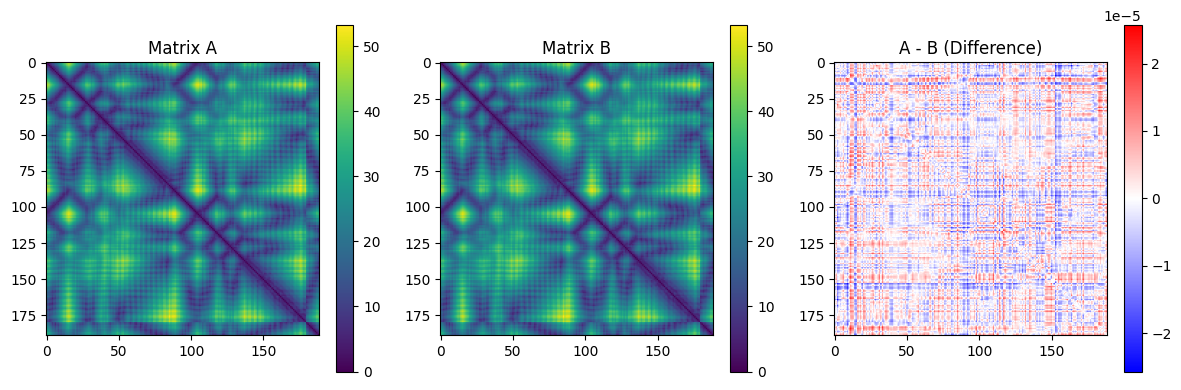

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Load the matrices
A = np.load("/home/elementare/GithubProjects/pMHC_graph/.pmhc_tmp/graphein_distmat.npy")
B = np.load("/home/elementare/GithubProjects/pMHC_graph/.pmhc_tmp/pmhc_titin_5bs0_renumber_nOH_distmat.npy")

# Check shape
print("Shape A:", A.shape)
print("Shape B:", B.shape)

# Compare element-wise
are_close = np.allclose(A, B, rtol=1e-5, atol=1e-8)
print("Matrices are close equal:", are_close)

# If not equal, compute differences

diff = A - B
print("Max absolute difference:", np.max(np.abs(diff)))
print("Mean absolute difference:", np.mean(np.abs(diff)))

# Visualize difference heatmap
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Matrix A")
plt.imshow(A, cmap="viridis")
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title("Matrix B")
plt.imshow(B, cmap="viridis")
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title("A - B (Difference)")
plt.imshow(diff, cmap="bwr", vmin=-np.max(np.abs(diff)), vmax=np.max(np.abs(diff)))
plt.colorbar()

plt.tight_layout()
plt.show()


In [1]:
graphein = set(['A:ILE:142', 'A:GLY:162', 'A:GLN:62', 'A:TYR:59', 'A:ALA:76', 'A:LYS:144', 'A:HIS:151', 'A:ARG:169', 'A:ALA:69', 'A:ARG:75', 'A:GLY:83', 'A:ALA:152', 'A:ALA:149', 'A:THR:73', 'A:LYS:146', 'A:TRP:147', 'A:VAL:158', 'A:LEU:168', 'A:THR:64', 'A:ASP:61', 'A:SER:42', 'A:GLU:55', 'A:ARG:157', 'A:GLY:56', 'A:VAL:165', 'A:GLU:58', 'A:GLU:154', 'A:GLU:89', 'A:LYS:68', 'A:GLU:63', 'A:ASN:77', 'A:ARG:156', 'A:GLY:79', 'A:MET:67', 'A:GLN:43', 'A:ARG:163', 'A:GLN:155', 'A:GLY:18', 'A:LEU:160', 'A:GLY:167', 'A:THR:80', 'A:THR:143', 'A:TYR:84', 'A:TYR:171', 'A:TYR:85', 'A:VAL:150', 'A:CYS:164', 'A:GLU:148', 'A:GLN:54', 'A:ALA:153', 'A:LYS:44', 'A:PHE:109', 'A:ASP:74', 'A:ARG:145', 'A:GLU:161', 'A:LEU:81', 'A:SER:71', 'A:ASN:66', 'A:GLU:19', 'A:HIS:70', 'A:GLN:72', 'A:TYR:159', 'A:ARG:65', 'A:ASP:166', 'A:ARG:170', 'A:ARG:108'])
without = set(['A:GLU:63', 'A:ASN:66', 'A:GLN:62', 'A:ASP:61', 'A:HIS:70', 'A:SER:71', 'A:ALA:76', 'A:ARG:75', 'A:THR:73', 'A:PHE:109', 'A:ALA:152', 'A:GLU:154', 'A:VAL:158', 'A:GLU:58', 'A:CYS:164', 'A:GLU:161', 'A:GLN:43', 'A:GLY:18', 'A:ALA:69', 'A:LEU:168', 'A:THR:143', 'A:ARG:169', 'A:MET:67', 'A:TYR:159', 'A:GLY:56', 'A:THR:80', 'A:ARG:170', 'A:GLU:89', 'A:GLN:72', 'A:ASP:74', 'A:TYR:84', 'A:TRP:147', 'A:LYS:44', 'A:GLU:148', 'A:LYS:68', 'A:ARG:65', 'A:ARG:156', 'A:ASP:166', 'A:TYR:85', 'A:ARG:108', 'A:VAL:150', 'A:GLY:83', 'A:LEU:160', 'A:THR:64', 'A:VAL:165', 'A:GLY:79', 'A:HIS:151', 'A:ASN:77', 'A:ARG:145', 'A:ALA:149', 'A:SER:42', 'A:TYR:59', 'A:GLY:162', 'A:GLN:155', 'A:ILE:142', 'A:LYS:144', 'A:ARG:163', 'A:ALA:153', 'A:LYS:146', 'A:TYR:171', 'A:GLU:19', 'A:GLY:167', 'A:GLU:55', 'A:GLN:54', 'A:LEU:81', 'A:ARG:157'])

In [2]:
graphein == without

True